# A few useful things to know about machine learning - Pedro Domingos

Some claims to explore: <i>Intuition Fails in High Dimensions</i>

> "Consider a nearest neighbor classifier with Hamming distance as the similarity measure, and sup- pose the class is just x1 ∧ x2. If there are no other features, this is an easy problem. But if there are 98 irrelevant features x3,..., x100, the noise from them completely swamps the signal in x1 and x2, and nearest neighbor effectively makes random predictions." - p5

> "Even more disturbing is that nearest neighbor still has a problem even if all 100 features are relevant!" - p5

[The failure of nearest neighbors](#knnfail) 

[Counterintuition](#counter)

I originally though the curse of dimensionality was mostly about increasing complexity, but proving this below, irrelevant features and noise makes metric-based learning completely random. We will also try to take a look at how [multivariate gaussians, oranges, and hypercubes] are distributed. Hint: not how you think.

[Blessing of Non-Uniformity](#BoNU)

The silver lining is the <i>blessing of non-uniformity</i>, which refers to the phenomenon that any low-dimensional manifold holding this data has the points very close to each other relative to the entire space. 

> ".. the space of digit images is much smaller than the space of all possible images" - p6

Follow-up:
- What about redundant features? 
- Why doesn't our KNN do much worse when we sample close to the classes?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

from numpy import linalg as LA

<a name="#counter"> <h2> Let's play with some multivariate gaussians and high-dimensional beings </h2> </a>

Norm of a gaussian concentrates on the square root of the dimensions

Therefore higher dimensions means you move further away from the center (most of the norms are far out)

Similar to a 'soap bubble' often described in high dimensions


Text(0.5, 1.0, 'Norms of zero-centered gaussians at various dimensions')

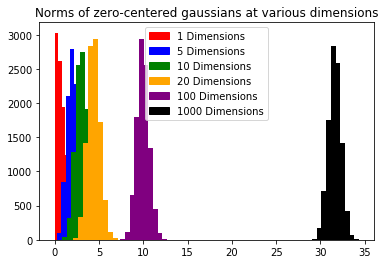

In [3]:

# try a norm comparison
dims = [1, 5, 10, 20, 100, 1000]
colors = ['red', 'blue', 'green', 'orange', 'purple', 'black']
for i, d in enumerate(dims):
    gauss = np.random.normal(0, 1, (10000, d))
    norms = [LA.norm(x) for x in gauss]
    #plt.label(str(dims))
    plt.hist(norms, color=colors[i])

patches = [mpatches.Patch(color=c, label=str(d) + " Dimensions") for c,d in zip(colors, dims)]
plt.legend(handles=patches)
plt.title("Norms of zero-centered gaussians at various dimensions")    

## Looking at the robustness of our "true" variables
Imagine 3 clusters of gaussian, with most dimensions centered at 0 and some 'test' dimensions centered at 5, 10, 15 respectively. 

It looks like our 'test' variable as the number of distinct variables gets gobbled up depends on dimensionality.

With more dimesions, the distance to the origin, and the distance to each other can become very close. Even though low-dimensional projections show clear separability.

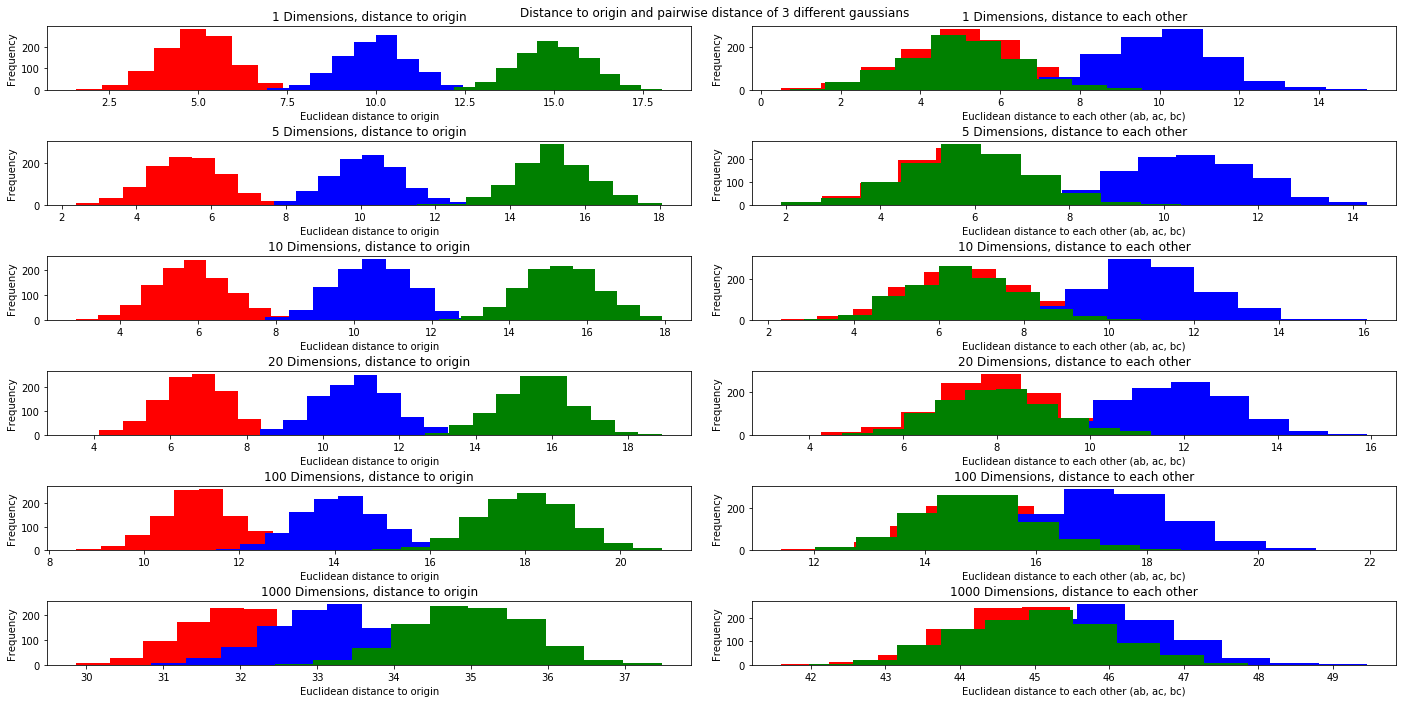

In [36]:
dims = [1, 5, 10, 20, 100, 1000]
test = 1
from scipy.spatial import distance
# distance to zero, distance to each other

fig, axes = plt.subplots(nrows=len(dims), ncols=2, figsize=(20,10))
axs = np.array(axes.flatten())
plt.tight_layout(pad=3)
plt.title("hi")
fig.suptitle("Distance to origin and pairwise distance of 3 different gaussians")

for i, dim in enumerate(dims[:]):
    means_a = [5]*min(dim, test) + [0]*(dim-test)
    means_b = [10]*min(dim, test) + [0]*(dim-test)
    means_c = [15]*min(dim, test) + [0]*(dim-test)
    cov_a = np.identity(dim)
    a = np.random.multivariate_normal(means_a, cov_a, (1000))
    b = np.random.multivariate_normal(means_b, cov_a, (1000))
    c = np.random.multivariate_normal(means_c, cov_a, (1000))
    ab = [distance.euclidean(x, y) for x,y in zip(a, b)]
    ac = [distance.euclidean(x, y) for x,y in zip(a, c)]
    bc = [distance.euclidean(x, y) for x,y in zip(b, c)]
    a0 = [distance.euclidean(x, 0) for x in a]
    b0 = [distance.euclidean(x, 0) for x in b]
    c0 = [distance.euclidean(x, 0) for x in c]
    axs[2*i].set_title(str(dim) + " Dimensions, distance to origin")
    axs[2*i].hist(a0, color='red')
    axs[2*i].hist(b0, color='blue')
    axs[2*i].hist(c0, color='green')
    axs[2*i].set_ylabel("Frequency")
    axs[2*i].set_xlabel("Euclidean distance to origin")
    axs[2*i +1].set_title(str(dim) + " Dimensions, distance to each other")
    axs[2*i +1].hist(ab, color='red')
    axs[2*i +1].hist(ac, color='blue')
    axs[2*i +1].hist(bc, color='green')
    axs[2*i+1].set_ylabel("Frequency")
    axs[2*i+1].set_xlabel("Euclidean distance to each other (ab, ac, bc)")
    #print(dim, np.mean(ab), np.mean(ac), np.mean(bc), np.mean(a0), np.mean(b0), np.mean(c0))



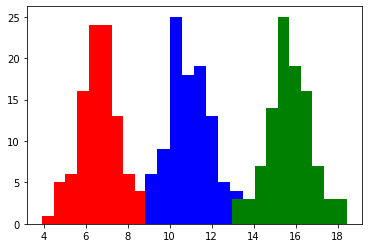

In [13]:
dims = [1, 20, 100, 1000]
test = 1
from scipy.spatial import distance
# distance to zero, distance to each other

for dim in dims[1:2]:
    means_a = [5]*min(dim, test) + [0]*(dim-test)
    means_b = [10]*min(dim, test) + [0]*(dim-test)
    means_c = [15]*min(dim, test) + [0]*(dim-test)
    cov_a = np.identity(dim)
    a = np.random.multivariate_normal(means_a, cov_a, (100))
    b = np.random.multivariate_normal(means_b, cov_a, (100))
    c = np.random.multivariate_normal(means_c, cov_a, (100))
    ab = [distance.euclidean(x, y) for x,y in zip(a, b)]
    ac = [distance.euclidean(x, y) for x,y in zip(a, c)]
    bc = [distance.euclidean(x, y) for x,y in zip(b, c)]
    a0 = [distance.euclidean(x, 0) for x in a]
    b0 = [distance.euclidean(x, 0) for x in b]
    c0 = [distance.euclidean(x, 0) for x in c]
    fig = plt.figure()
    plt.hist(a0, color='red')
    plt.hist(b0, color='blue')
    plt.hist(c0, color='green')
    #print(dim, np.mean(ab), np.mean(ac), np.mean(bc), np.mean(a0), np.mean(b0), np.mean(c0))

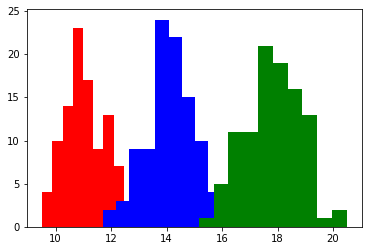

In [14]:
dims = [1, 20, 100, 1000]
test = 1
from scipy.spatial import distance
# distance to zero, distance to each other

for dim in dims[2:3]:
    means_a = [5]*min(dim, test) + [0]*(dim-test)
    means_b = [10]*min(dim, test) + [0]*(dim-test)
    means_c = [15]*min(dim, test) + [0]*(dim-test)
    cov_a = np.identity(dim)
    a = np.random.multivariate_normal(means_a, cov_a, (100))
    b = np.random.multivariate_normal(means_b, cov_a, (100))
    c = np.random.multivariate_normal(means_c, cov_a, (100))
    ab = [distance.euclidean(x, y) for x,y in zip(a, b)]
    ac = [distance.euclidean(x, y) for x,y in zip(a, c)]
    bc = [distance.euclidean(x, y) for x,y in zip(b, c)]
    a0 = [distance.euclidean(x, 0) for x in a]
    b0 = [distance.euclidean(x, 0) for x in b]
    c0 = [distance.euclidean(x, 0) for x in c]
    fig = plt.figure()
    plt.hist(a0, color='red')
    plt.hist(b0, color='blue')
    plt.hist(c0, color='green')
    #print(dim, np.mean(ab), np.mean(ac), np.mean(bc), np.mean(a0), np.mean(b0), np.mean(c0))